In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
all_feas = pd.read_csv('./all_feas.csv')

当前（2019 年末） Twitter Active Users 数是多少？[10 Twitter Statistics Every Marketer Should Know in 2020 [Infographic]](https://www.oberlo.com/blog/twitter-statistics)

>One of the first questions that come to mind when considering a Twitter marketing campaign is probably: how many people use Twitter?
>
>Twitter boasts [330 million monthly active users](https://s22.q4cdn.com/826641620/files/doc_financials/2019/q1/Q1-2019-Slide-Presentation.pdf) (as of 2019 Q1). Of these, more than 40 percent, or more specifically, 134 million, use the service on a daily basis (Twitter, 2019). 

In [3]:
active_users_num = 330000000

In [4]:
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

# Twitter 要求所有 request 使用 OAuth 进行身份验证
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# 构建 API 实例：wait_on_rate_limit=True（速度限制）
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
u_TaylorSwift = api.get_user(screen_name='taylorswift13')
u_ESPN = api.get_user(screen_name='espn')
u_BillGates = api.get_user(screen_name='BillGates')
u_YouTube = api.get_user(screen_name='YouTube')
u_CNN = api.get_user(screen_name='CNN')
u_BarackObama = api.get_user(screen_name='BarackObama')
u_KimKardashian = api.get_user(screen_name='KimKardashian')
u_CristianoRonaldo = api.get_user(screen_name='Cristiano')
u_JimmyFallon = api.get_user(screen_name='jimmyfallon')
u_OprahWinfrey = api.get_user(screen_name='Oprah')
u_LilWayne = api.get_user(screen_name='LilTunechi')
u_NASA = api.get_user(screen_name='NASA')

In [6]:
famous_list = [u_TaylorSwift, u_ESPN, u_BillGates, u_YouTube, u_CNN, u_BarackObama, 
               u_KimKardashian, u_CristianoRonaldo, u_JimmyFallon, u_OprahWinfrey, 
               u_LilWayne, u_NASA]

In [7]:
names_label = ['@'+i.screen_name for i in famous_list]
active_accounts_ratio = [i.followers_count/active_users_num for i in famous_list]

In [8]:
Nike_in_influencers_ratio = []
Nike_in_influencers_ratio.append(sum(all_feas['u_TaylorSwift_following'])/len(all_feas))
Nike_in_influencers_ratio.append(sum(all_feas['u_ESPN_following'])/len(all_feas))
Nike_in_influencers_ratio.append(sum(all_feas['u_BillGates_following'])/len(all_feas))
Nike_in_influencers_ratio.append(sum(all_feas['u_YouTube_following'])/len(all_feas))
Nike_in_influencers_ratio.append(sum(all_feas['u_CNN_following'])/len(all_feas))
Nike_in_influencers_ratio.append(sum(all_feas['u_BarackObama_following'])/len(all_feas))
Nike_in_influencers_ratio.append(sum(all_feas['u_KimKardashian_following'])/len(all_feas))
Nike_in_influencers_ratio.append(sum(all_feas['u_CristianoRonaldo_following'])/len(all_feas))
Nike_in_influencers_ratio.append(sum(all_feas['u_JimmyFallon_following'])/len(all_feas))
Nike_in_influencers_ratio.append(sum(all_feas['u_OprahWinfrey_following'])/len(all_feas))
Nike_in_influencers_ratio.append(sum(all_feas['u_LilWayne_following'])/len(all_feas))
Nike_in_influencers_ratio.append(sum(all_feas['u_NASA_following'])/len(all_feas))

Text(0, 0.5, '% Following')

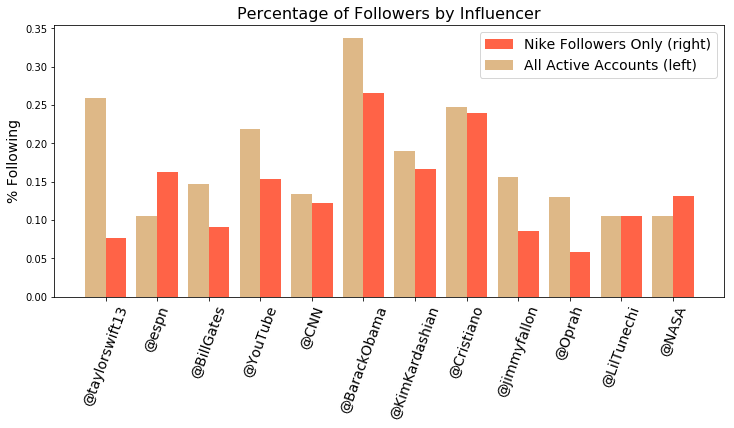

In [62]:
x = np.arange(12)
bar_width = 0.4
plt.figure(figsize=(12, 5))
plt.bar(x=x+bar_width, height=Nike_in_influencers_ratio, width=bar_width, color='tomato', label='Nike Followers Only (right)')
plt.bar(x=x, height=active_accounts_ratio, width=bar_width, color='burlywood', label='All Active Accounts (left)')
plt.legend(loc='best', fontsize=14)
plt.title('Percentage of Followers by Influencer', fontsize=16)
plt.xticks(x+bar_width/2, names_label, rotation=70, fontsize=14)
plt.ylabel('% Following', fontsize=14)

---

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [33]:
M = np.array(all_feas[['u_TaylorSwift_following', 'u_ESPN_following', 'u_BillGates_following', 
                       'u_YouTube_following', 'u_CNN_following', 'u_BarackObama_following', 
                       'u_KimKardashian_following', 'u_CristianoRonaldo_following', 
                       'u_JimmyFallon_following', 'u_OprahWinfrey_following', 'u_LilWayne_following', 
                       'u_NASA_following']])

In [34]:
pca = PCA(n_components=12)
pca.fit_transform(M)

array([[-5.01870702e-01,  1.13810481e-01,  2.87497846e-02, ...,
         1.58297640e-02, -1.00097909e-03,  7.15989044e-03],
       [-5.01870702e-01,  1.13810481e-01,  2.87497846e-02, ...,
         1.58297640e-02, -1.00097909e-03,  7.15989044e-03],
       [ 2.67045131e-01,  4.91806863e-01, -3.37982779e-01, ...,
         3.71948711e-02,  8.86953022e-02,  2.04576178e-02],
       ...,
       [ 1.09351608e+00, -6.57242406e-01, -1.94994836e-01, ...,
         1.59324056e-01, -2.54592892e-01,  8.72972752e-01],
       [-2.67768435e-01, -8.30068375e-01,  7.67341135e-03, ...,
        -2.04692796e-02, -6.31649335e-02,  2.30666954e-02],
       [-2.31169835e-01,  2.02068307e-01,  4.79318213e-01, ...,
        -2.54013860e-01, -5.82113332e-02,  1.37045618e-01]])

In [35]:
print(pca.explained_variance_ratio_)

[0.28435302 0.12533762 0.09458635 0.08885669 0.08342911 0.06520976
 0.05487353 0.05212895 0.04713512 0.03955293 0.03805629 0.02648064]


In [38]:
EV = [sum(pca.explained_variance_ratio_[0:i]) for i in range(0, 13)]
EV

[0,
 0.28435301911877675,
 0.409690638499935,
 0.5042769857429107,
 0.593133673660834,
 0.6765627841313816,
 0.7417725418112645,
 0.7966460680764853,
 0.8487750214076877,
 0.8959101429900034,
 0.9354630683971119,
 0.9735193594381665,
 1.0]

Text(0.5, 1.0, 'Explained Variance by Dimensionality')

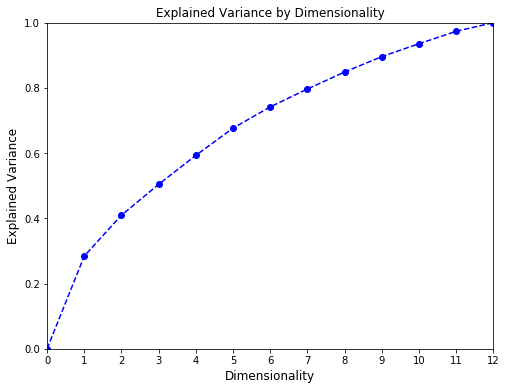

In [59]:
x = np.arange(13)
plt.figure(figsize=(8, 6))
plt.plot(x, EV, 'bo--')
plt.xticks(x, labels=[i for i in range(0, 13)])
plt.xlim(0, 12)
plt.ylim(0, 1.0)
plt.xlabel('Dimensionality', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.title('Explained Variance by Dimensionality')